Первые 5 строк набора данных:
   sepal_length  sepal_width  petal_length  petal_width      variety
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Количество пропусков в каждом признаке:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
variety         0
dtype: int64

Первые 5 строк масштабированных данных:
   sepal_length  sepal_width  petal_length  petal_width      variety
0      0.222222     0.625000      0.067797     0.041667  Iris-setosa
1      0.166667     0.416667      0.067797     0.041667  Iris-setosa
2      0.111111     0.500000      0.050847     0.041667  Iris-setosa
3      0.083333     0.458333      0.084746     0.041667  Iris-setosa
4      0.194444     0.6666

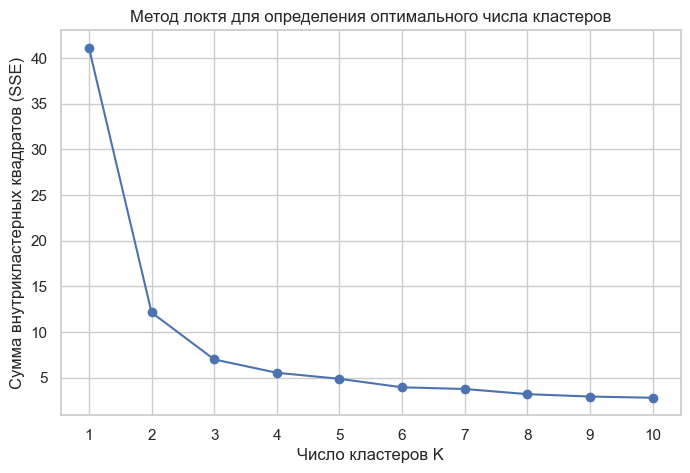


Применение алгоритма K-средних с K=3:
Сходимость достигнута на итерации 5

Первые 5 строк данных с назначенными кластерами:
   sepal_length  sepal_width  petal_length  petal_width      variety  Cluster
0      0.222222     0.625000      0.067797     0.041667  Iris-setosa        1
1      0.166667     0.416667      0.067797     0.041667  Iris-setosa        1
2      0.111111     0.500000      0.050847     0.041667  Iris-setosa        1
3      0.083333     0.458333      0.084746     0.041667  Iris-setosa        1
4      0.194444     0.666667      0.067797     0.041667  Iris-setosa        1


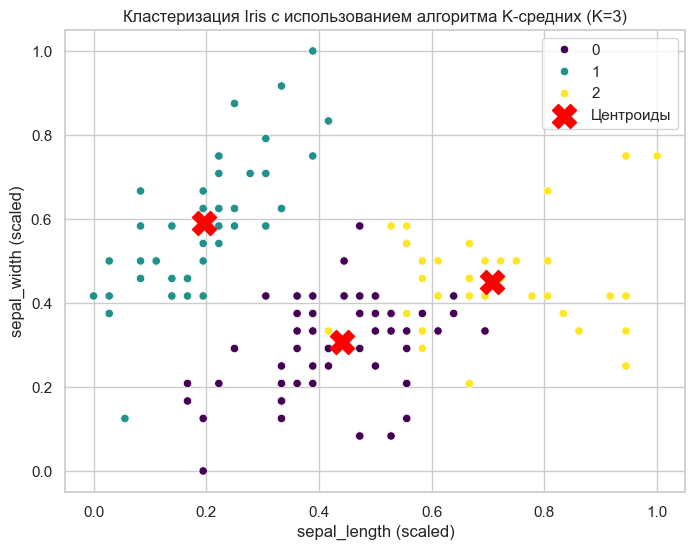


Коэффициент силуэта: 0.5043


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Установка стиля графиков
sns.set(style="whitegrid")

# Этап 0. Подготовка данных

# Шаг 1. Загрузка данных из UCI ML репозитория
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
data = pd.read_csv(url, names=columns)
print("Первые 5 строк набора данных:")
print(data.head())

# Шаг 2. Проверка наличия пропусков данных
print("\nКоличество пропусков в каждом признаке:")
print(data.isnull().sum())

# Шаг 3. Масштабирование данных
scaler = MinMaxScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])
print("\nПервые 5 строк масштабированных данных:")
print(data_scaled.head())

# Этап 1. Реализация алгоритма K-средних

def initialize_centroids(X, k):
    """
    Инициализация центроидов путем случайного выбора K объектов из набора данных.
    """
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def compute_euclidean_distance(a, b):
    """
    Вычисление евклидового расстояния между объектами и центроидом.
    """
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def assign_clusters(X, centroids):
    """
    Назначение каждого объекта к ближайшему центроиду.
    """
    distances = np.array([compute_euclidean_distance(X, centroid) for centroid in centroids]).T
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """
    Перерасчет центроидов как среднего значения объектов в каждом кластере.
    """
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    """
    Реализация алгоритма K-средних.
    """
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Проверка сходимости
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Сходимость достигнута на итерации {i+1}")
            break
        centroids = new_centroids
    return labels, centroids

# Подготовка данных для кластеризации
X = data_scaled[features].values

# Определение диапазона K для метода локтя
K_range = range(1, 11)
SSE = []

print("\nОпределение оптимального числа кластеров с использованием метода локтя:")
for k in K_range:
    labels, centroids = k_means(X, k)
    sse = 0
    for i in range(k):
        cluster_points = X[labels == i]
        sse += np.sum((cluster_points - centroids[i]) ** 2)
    SSE.append(sse)
    print(f"K={k}, SSE={sse:.4f}")

# Визуализация метода локтя
plt.figure(figsize=(8,5))
plt.plot(K_range, SSE, marker='o')
plt.xlabel('Число кластеров K')
plt.ylabel('Сумма внутрикластерных квадратов (SSE)')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Выбор K=3 и применение алгоритма K-средних
print("\nПрименение алгоритма K-средних с K=3:")
K = 3
labels, centroids = k_means(X, K)

# Добавление меток кластеров в DataFrame
data_scaled_df = data_scaled.copy()
data_scaled_df['Cluster'] = labels

# Просмотр первых нескольких строк с кластерами
print("\nПервые 5 строк данных с назначенными кластерами:")
print(data_scaled_df.head())

# Визуализация кластеров по двум признакам
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', palette='viridis', data=data_scaled_df, legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Центроиды')
plt.title('Кластеризация Iris с использованием алгоритма K-средних (K=3)')
plt.xlabel('sepal_length (scaled)')
plt.ylabel('sepal_width (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Оценка качества кластеризации с использованием коэффициента силуэта
sil_score = silhouette_score(X, labels)
print(f'\nКоэффициент силуэта: {sil_score:.4f}')
